In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 579 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# symbols = [stock, market]
benchmark = '^GSPC'
symbols = ['CL=F','^VIX','^IXIC','^TNX','BSV','^DJI']

In [ ]:
!gdown 1IV_jO9_d6PzP70suYu5G6iOE71zlM6mU

Downloading...
From: https://drive.google.com/uc?id=1IV_jO9_d6PzP70suYu5G6iOE71zlM6mU
To: /content/Risk.xlsx
100% 294k/294k [00:00<00:00, 96.1MB/s]


In [ ]:
df1 = pd.read_excel('Risk.xlsx')

In [ ]:
df1.set_index('Data', inplace = True)

In [ ]:
# Período que quero calcular o alpha e o beta
start = '2020-01-01'
end = '2022-12-01'

In [ ]:
selic = df1['Taxa SELIC']

In [ ]:
selic = selic/252

In [ ]:
def Beta(data, benchmark, start, startB, endB):
    aux = data.copy()
    aux[benchmark] = yf.download(benchmark, start = start, end=endB)['Adj Close']

    price_change = aux[['Adj Close', benchmark]].pct_change()

    aux = price_change.drop(price_change.index[0])
  
    
    aux2 = aux[startB:endB]
    periodo = len(aux[startB:endB])

    # Create arrays for x and y variables in the regression model
    x = np.array(aux['Adj Close']).reshape((-1,1))
    y = np.array(aux[benchmark])

    # Calcular o beta e o alpha

    beta = []

    for index in range(len(x) + 1 - periodo, len(x) + 1):

        model = LinearRegression().fit(x[:index], y[:index])
        beta.append(model.coef_[0])

    aux2['Beta'] = pd.Series(beta).values
    
    return aux2.copy()

In [ ]:
planilhas = []

for ticker in symbols:

    data = yf.download([ticker, benchmark], start = '2020-01-01', end=end)['Adj Close']

    price_change = data.pct_change()

    df = price_change.drop(price_change.index[0])
  
    
    df2 = df[start:end]
    periodo = len(df[start:end])

    # Create arrays for x and y variables in the regression model
    x = np.array(df[ticker]).reshape((-1,1))
    y = np.array(df[benchmark])

    # Calcular o beta e o alpha

    beta = []

    for index in range(len(x) + 1 - periodo, len(x) + 1):

        model = LinearRegression().fit(x[:index], y[:index])
        beta.append(model.coef_[0])

    df2['Beta'] = pd.Series(beta).values
    
    
    intersect = df2.index.intersection(selic.index)
    
    df2 = df2.loc[intersect]
    risk_free = selic.loc[intersect]

    # calcular o alpha

    alpha = df2[ticker].values - risk_free.values - df2['Beta'].values*( df2[benchmark].values - risk_free.values)
    
    for i in range(len(risk_free)):
        print('Alpha: ', alpha[i], '   Beta: ', beta[i])


    df2['Alpha'] = alpha

    planilhas.append(df2)

[*********************100%***********************]  2 of 2 completed
Alpha:  0.013105209224169405    Beta:  0.0
Alpha:  -0.01941975378760339    Beta:  -0.3912380001299039
Alpha:  -0.029572903818323046    Beta:  -0.15316078876905292
Alpha:  -0.06836840208133074    Beta:  -0.12946356686107088
Alpha:  -0.019593811970606723    Beta:  -0.1198255720529042
Alpha:  -0.028543549742821795    Beta:  -0.11579993130680231
Alpha:  -0.03508305450807846    Beta:  -0.1299672759935431
Alpha:  -0.017416544070975974    Beta:  -0.13379983072943458
Alpha:  -0.026762634974372684    Beta:  -0.13403180387806102
Alpha:  -0.006014837937016908    Beta:  -0.09194393939050945
Alpha:  -0.018332335796441446    Beta:  -0.0892613473333363
Alpha:  -0.022681069488801466    Beta:  -0.08970988476103389
Alpha:  -0.04613090931753511    Beta:  -0.0725154904503947
Alpha:  -0.038842125181602044    Beta:  -0.06825599293645365
Alpha:  -0.0433472373501248    Beta:  -0.026507212560936817
Alpha:  -0.03651603720390065    Beta: 

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


 0.009657288768798351
Alpha:  -0.010786834862698288    Beta:  0.03716702174171483
Alpha:  -0.019606688009333306    Beta:  0.03592331689828738
Alpha:  -0.03938484133777852    Beta:  0.027182526703952003
Alpha:  -0.027308873125619047    Beta:  0.036265103269775674
Alpha:  -0.04549074722238475    Beta:  0.00903023739901462
Alpha:  -0.02742000684339844    Beta:  0.007403026225136444
Alpha:  0.005858151566344347    Beta:  0.054631041362152466
Alpha:  -0.01177429982802246    Beta:  0.05729866927914253
Alpha:  -0.02748780938960779    Beta:  0.06152647687291613
Alpha:  -0.030872904520310183    Beta:  0.05468911589149458
Alpha:  -0.008204220320155083    Beta:  0.05411873664810395
Alpha:  0.008836809226103966    Beta:  0.06751376332209172
Alpha:  -0.010446769822544968    Beta:  0.0627563741637845
Alpha:  -0.0033138753538336846    Beta:  0.06169795789508186
Alpha:  -0.015322657953926629    Beta:  0.05908729097699525
Alpha:  0.00811497015819429    Beta:  0.06460758460058112
Alpha:  -0.006122927078

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


Alpha:  0.10683801113179386    Beta:  0.0
Alpha:  -0.03066727756190407    Beta:  -0.07764948731045646
Alpha:  -0.02296744329216822    Beta:  -0.057984180243246614
Alpha:  -0.04298180255624767    Beta:  -0.06895490508729693
Alpha:  -0.08589698860129119    Beta:  -0.07206709931089933
Alpha:  -0.017324523315300593    Beta:  -0.07182392618331351
Alpha:  -0.03736831160755459    Beta:  -0.07627327629936455
Alpha:  -0.013236910651770626    Beta:  -0.07686301256480946
Alpha:  -0.016236001491314035    Beta:  -0.07677746379027339
Alpha:  -0.026232306134208256    Beta:  -0.07922222131240769
Alpha:  -0.03640132326692757    Beta:  -0.07971068313774464
Alpha:  0.042940368362282766    Beta:  -0.07869729880097652
Alpha:  -0.014143315753919465    Beta:  -0.07874895377835445
Alpha:  -0.013323559718349306    Beta:  -0.07876372366206828
Alpha:  0.10208442318641794    Beta:  -0.08229657243383937
Alpha:  0.23213392242343317    Beta:  -0.07430116565028559
Alpha:  -0.12498037248367971    Beta:  -0.07473962556

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


Alpha:  -0.025315509120657005    Beta:  0.0
Alpha:  -0.0008918656420080408    Beta:  0.7861068905051158
Alpha:  -0.002046868098688169    Beta:  0.7763687553565961
Alpha:  -0.0004071725730165881    Beta:  0.8253072652020361
Alpha:  -8.313212745376247e-06    Beta:  0.8630617454867183
Alpha:  -0.002826407598347149    Beta:  0.8517387184275323
Alpha:  0.0015623804672218883    Beta:  0.8265157210641745
Alpha:  -0.004680302954192505    Beta:  0.8019515884019394
Alpha:  -0.004295701875427408    Beta:  0.793320401330894
Alpha:  0.0004779819819209904    Beta:  0.8035452594285509
Alpha:  -0.0031049256045534296    Beta:  0.8056818400679369
Alpha:  -0.0030151884536438953    Beta:  0.8142390396727966
Alpha:  -0.002077427067918816    Beta:  0.815309508689372
Alpha:  -0.0021611035081814337    Beta:  0.8153053443698114
Alpha:  -0.004615744796549363    Beta:  0.8360767374312315
Alpha:  -0.008998656382451668    Beta:  0.8229097323183889
Alpha:  0.0027971160815146766    Beta:  0.809083725499126
Alpha:  -

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


 0.037415248295821796    Beta:  0.13648297356970227
Alpha:  -0.07602917632467432    Beta:  0.1448686906026154
Alpha:  -0.0840494523231665    Beta:  0.14539658965325447
Alpha:  -0.12256724577581267    Beta:  0.1411746034992171
Alpha:  0.031449679820503236    Beta:  0.14289524654796404
Alpha:  -0.09661196022111643    Beta:  0.13709418449522157
Alpha:  -0.028239445908039167    Beta:  0.13584247190414045
Alpha:  -0.07416552318674188    Beta:  0.13867568688188067
Alpha:  0.12884801622341813    Beta:  0.1386264198731499
Alpha:  0.07663589199505004    Beta:  0.13890023390054704
Alpha:  0.02065502795855234    Beta:  0.14837325270144888
Alpha:  -0.060296163782855274    Beta:  0.14686345968315925
Alpha:  0.016562887529081926    Beta:  0.14838907611156849
Alpha:  -0.012848439606276178    Beta:  0.1474371329569356
Alpha:  -0.16070486507144274    Beta:  0.1469009230072659
Alpha:  -0.05866716359801407    Beta:  0.14728576393392678
Alpha:  0.057583875518738496    Beta:  0.14720050066463733
Alpha:  -0

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


Alpha:  -0.016592404469409967    Beta:  0.0
Alpha:  -0.1368438351271668    Beta:  -8.545434519822102
Alpha:  -0.1903716162890494    Beta:  -8.545356269532741
Alpha:  -0.11645737123979519    Beta:  -7.824069008122368
Alpha:  -0.09623285878000767    Beta:  -7.301846648211941
Alpha:  -0.16747929669453224    Beta:  -7.408856001264196
Alpha:  -0.10137179512780958    Beta:  -7.95643872820991
Alpha:  -0.1700830967051055    Beta:  -8.056463440497133
Alpha:  -0.1299979204311986    Beta:  -7.250333958171375
Alpha:  -0.08801948240875271    Beta:  -7.745456343235175
Alpha:  -0.12200887247254563    Beta:  -7.697542662431339
Alpha:  -0.15172076736716625    Beta:  -6.730949087970691
Alpha:  -0.12880358982523063    Beta:  -6.520339371069368
Alpha:  -0.11615394679861335    Beta:  -6.0930953052976085
Alpha:  -0.19340578958394508    Beta:  -6.657482334395403
Alpha:  -0.2982258991901822    Beta:  -8.503722059039752
Alpha:  -0.08259843225653735    Beta:  -8.69453034284186
Alpha:  -0.14505243235629017    Be

<ipython-input-171-b41a5b33b2a8>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Beta'] = pd.Series(beta).values


Alpha:  -0.025563179911982932    Beta:  0.0
Alpha:  -0.0010108824423988947    Beta:  1.0093561864424097
Alpha:  -0.001268207184657033    Beta:  1.0048774974169965
Alpha:  -0.0006234731101967383    Beta:  0.8910678090983638
Alpha:  -0.0006729908119424803    Beta:  0.8716980098371255
Alpha:  -0.004644139495392923    Beta:  0.8571648940754576
Alpha:  -0.005047183213350062    Beta:  0.9084048055318935
Alpha:  0.0006284627431142158    Beta:  0.89383395964932
Alpha:  -0.0006941126279500966    Beta:  0.8747369675459711
Alpha:  -0.000348722907485716    Beta:  0.8687070711235917
Alpha:  -0.0039060549056156267    Beta:  0.8701161331223748
Alpha:  -0.00559633455481812    Beta:  0.8475043182593721
Alpha:  -0.003227830014247684    Beta:  0.8483431974663209
Alpha:  -0.0046048033674289095    Beta:  0.8427117641489081
Alpha:  0.0012572768387954202    Beta:  0.9266984060820647
Alpha:  -0.000936487211531889    Beta:  0.9696030490666477
Alpha:  -0.0034702188200857664    Beta:  1.0038455593791042
Alpha:  

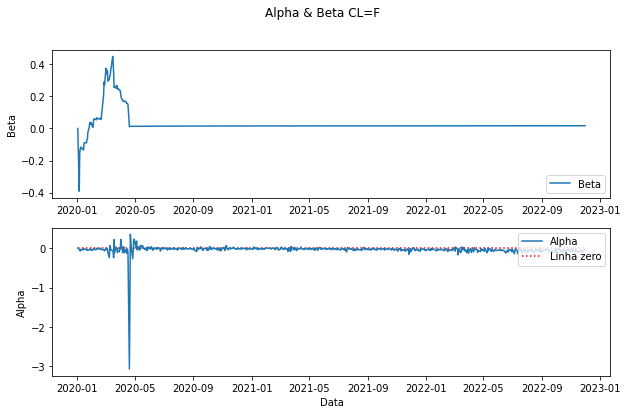

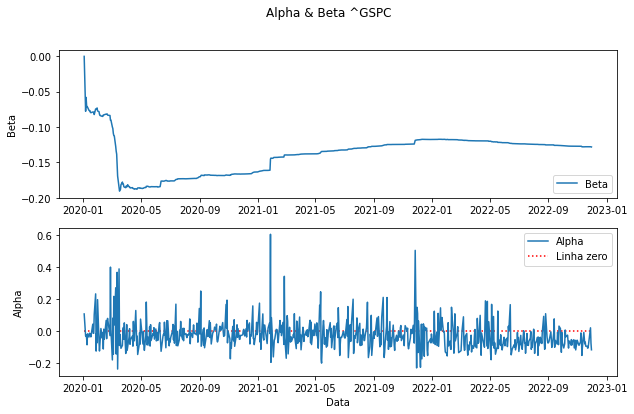

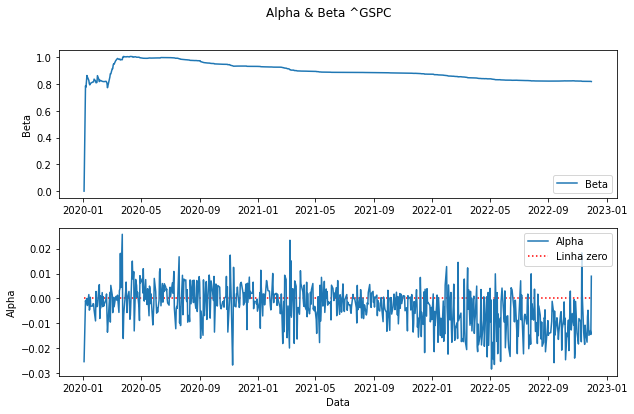

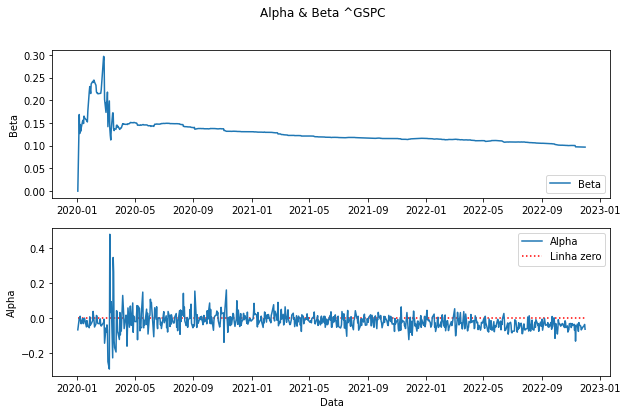

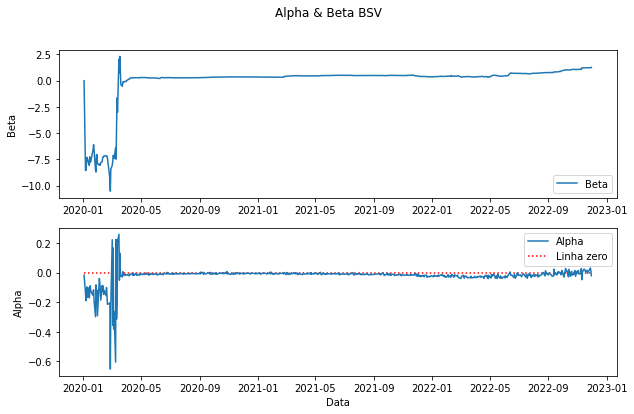

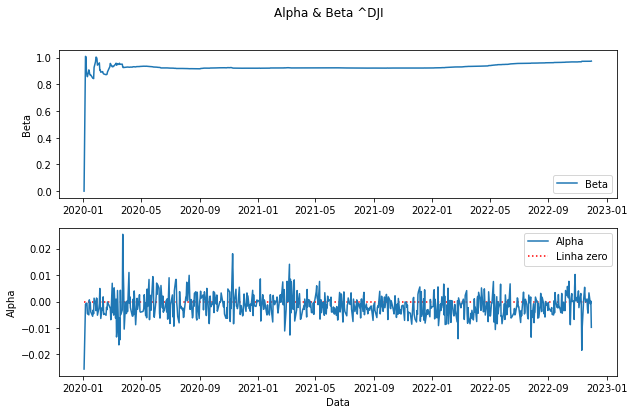

In [ ]:
for i in range(len(planilhas)):

  y1 = planilhas[i]['Beta'].values
  y2 = planilhas[i]['Alpha'].values
  x = planilhas[i].index.values

  fig, (ax1, ax2) = plt.subplots(2,  figsize=(10, 6))

  fig.suptitle('Alpha & Beta ' + planilhas[i].columns[0])

  ax1.plot(x, y1, label='Beta')
  ax1.set_ylabel('Beta')


  ax1.legend(loc="lower right")

  ax2.plot(x, y2, label='Alpha')
  ax2.hlines(0, x[0], x[len(x)-1], color='red', linestyles = 'dotted', label='Linha zero')

  ax2.set_xlabel('Data')
  ax2.set_ylabel('Alpha')

  # sem isso, não plota legenda
  ax2.legend(loc="upper right")

In [ ]:
for i in range(len(symbols)):
    print(planilhas[i].columns[0], ':      Beta: ', planilhas[i].iat[len(planilhas[0])-1, 2] , '     Alpha: ', planilhas[i].iat[len(planilhas[i])-1, 3])

CL=F :      Beta:  0.017086880681441586      Alpha:  -0.023718699781457624


IndexError: ignored

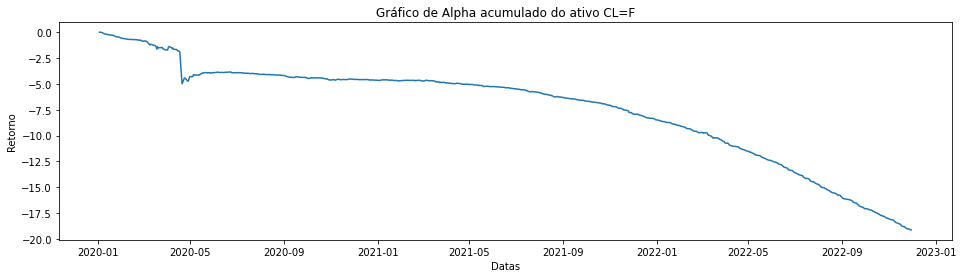

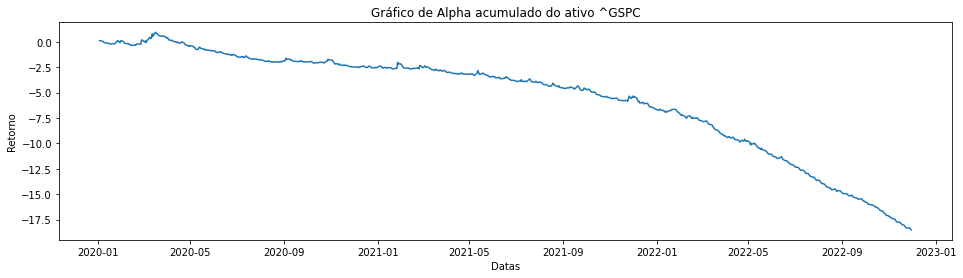

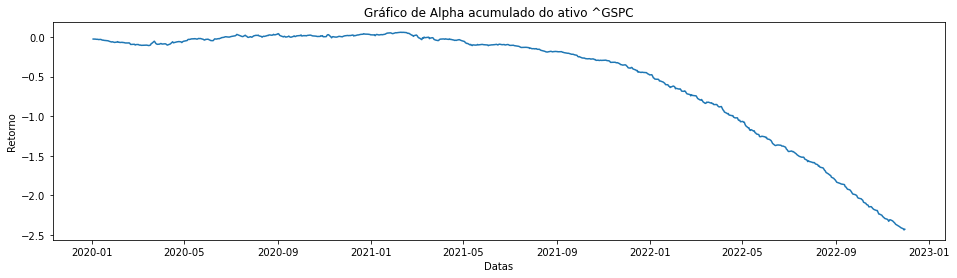

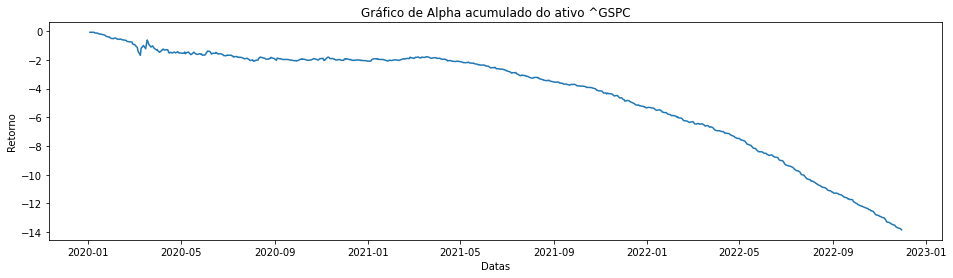

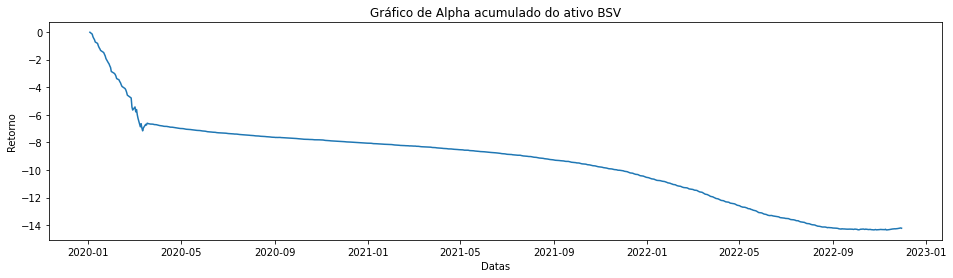

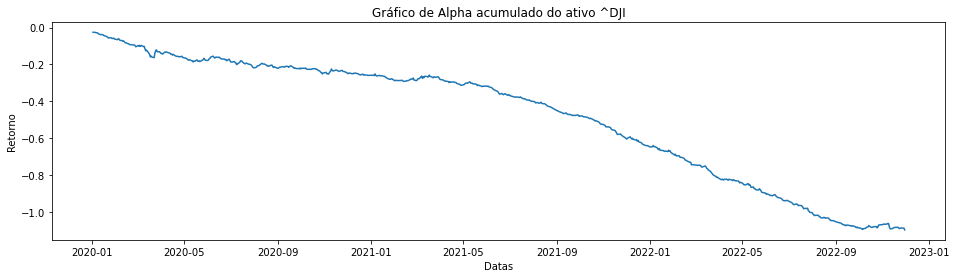

In [ ]:
for i in range(len(planilhas)):

  y = planilhas[i]['Alpha'].cumsum().values
  x = planilhas[i].index.values

  plt.figure(figsize=(16, 4))

  plt.plot(x, y)
  plt.xlabel('Datas')
  plt.ylabel('Retorno')
  plt.title('Gráfico de Alpha acumulado do ativo ' + planilhas[i].columns[0])

In [ ]:
def Longshort(ativo1, ativo2):
    
    
    intersect = ativo1.index.intersection(ativo2.index)
    
    long = ativo1.loc[intersect].copy()
    short = ativo2.loc[intersect].copy()
    
    df = pd.DataFrame(long.index,index=long.index)
    df = df.drop(columns = df.columns[0], axis = 1)
    df['Adj Close'] = long['Adj Close'].values - short['Adj Close'].values
    df['Return Close'] = long.pct_change()['Adj Close'].values - short.pct_change()['Adj Close'].values
    df = df.drop(price_change.index[0])
    
    return df

In [ ]:
ativo1 = yf.download('JPM', start = '2020-2-22', end=end)
ativo2 = yf.download('MTB', start = '2020-2-22', end=end)

In [ ]:
start = '2021-01-01'
end = '2022-12-01'

In [ ]:
Beta1 = Beta(ativo1, benchmark, '2020-2-22', start, end)
Beta2 = Beta(ativo2, benchmark, '2020-2-22', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<ipython-input-125-79ac25809f16>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['Beta'] = pd.Series(beta).values


<ipython-input-125-79ac25809f16>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux2['Beta'] = pd.Series(beta).values


In [ ]:
df = Longshort(ativo1,ativo2)

KeyError: ignored

In [ ]:
y = df['Return Close'].cumsum().values
x = df.index.values

plt.figure(figsize=(16, 4))

plt.plot(x, y)
plt.xlabel('Datas')
plt.ylabel('Retorno')
plt.title('Gráfico da soma acumulada do retorno Long-Short')

In [ ]:
y = df['Return Close'].cumsum().values
y1 = Beta1['Beta'].values
y2 = Beta2['Beta'].values
x = df.index.values
x1 = Beta1.index.values

fig, (ax1, ax2) = plt.subplots(2,  figsize=(10, 6))

fig.suptitle('Gráfico do retorno acumulado de Long-Short ')

ax1.plot(x, y, label='Retorno Long-Short')
ax1.set_ylabel('Retorno Long-Short')


ax1.legend(loc="lower right")

ax2.plot(x1, y1, label='Beta do Long')
ax2.plot(x1, y2, label='Beta do Short')

ax2.set_xlabel('Datas')
ax2.set_ylabel('Beta')

# sem isso, não plota legenda
ax2.legend(loc="upper right")